In [21]:
import pandas as pd
protein = pd.read_table('protein.txt',sep = '\t')
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [22]:
protein.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


In [23]:
protein.shape

(25, 10)

In [24]:
sprotein = protein.drop(['Country'], axis = 1) # 删除Country列之后的数据
sprotein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [25]:
from sklearn import preprocessing
sprotein_scaled=preprocessing.scale(sprotein)
sprotein_scaled

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527, -0.30326057],
       [-0.10001666, -0.82775116, -0.21551801,  2.38269753,  0

In [26]:
#K值得选择
from sklearn.cluster import KMeans
NumberOfClusters=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in NumberOfClusters]
score=[kmeans[i].fit(sprotein_scaled).score(sprotein_scaled) for i in range(len(kmeans))]
score

[-225.0,
 -139.50737044831814,
 -128.4792378587896,
 -90.41954159596906,
 -76.17651062876581,
 -66.90174189921862,
 -58.97534057362815,
 -54.170903729940456,
 -50.77383046431147,
 -38.703104529037894,
 -36.1905085716244,
 -26.78183584894583,
 -24.445150863759448,
 -20.57919694072666,
 -18.984021110816304,
 -15.458559692908517,
 -13.962941575131865,
 -10.036516369698289,
 -7.277981923786756]

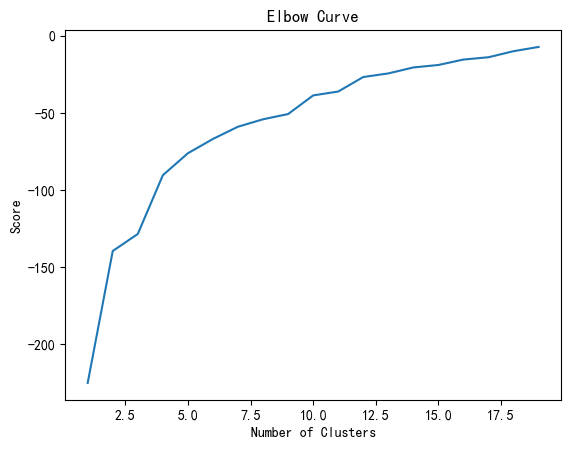

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumberOfClusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [28]:
myKMeans=KMeans(algorithm="elkan",
               n_clusters=5,
               n_init=10,
               max_iter=200,
               verbose=0)
myKMeans.fit(sprotein_scaled)
y_kmeans=myKMeans.predict(sprotein)
print(y_kmeans)

[1 2 2 1 4 0 2 0 2 1 1 2 1 2 0 4 3 1 1 0 2 2 1 2 1]


E:\Software\anaconda3\envs\python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [29]:
protein["所隶属的类簇"]=y_kmeans
protein

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,所隶属的类簇
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,2
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,2
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,4
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,0
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,2
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,0
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,2
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,1


In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(sprotein,y_kmeans)

np.float64(0.1364362558127492)

In [31]:
number=range(2,20)
myKMeans_list=[KMeans(algorithm="elkan",
               n_clusters=i,
               n_init=10,
               max_iter=200,
               verbose=0) for i in number]
y_kmeans_list=[myKMeans_list[i].fit(sprotein_scaled).
               predict(sprotein_scaled) for i in range(len(number))]
score=[silhouette_score(sprotein,y_kmeans_list[i]) for i in range(len(number))]

In [32]:
score

[np.float64(0.40493405014862177),
 np.float64(0.3177713810245647),
 np.float64(0.19176307344556962),
 np.float64(0.23089117573690687),
 np.float64(0.12565267880504793),
 np.float64(0.20542722281663317),
 np.float64(0.16713354027547417),
 np.float64(0.1602662821195311),
 np.float64(0.04053497922515425),
 np.float64(0.13528249120860142),
 np.float64(0.09865512101952206),
 np.float64(0.05580158189910041),
 np.float64(0.03473963243255433),
 np.float64(0.04649562838653163),
 np.float64(0.04670651599769735),
 np.float64(0.0684308804959834),
 np.float64(-0.023755065761375153),
 np.float64(0.01316594467195259)]

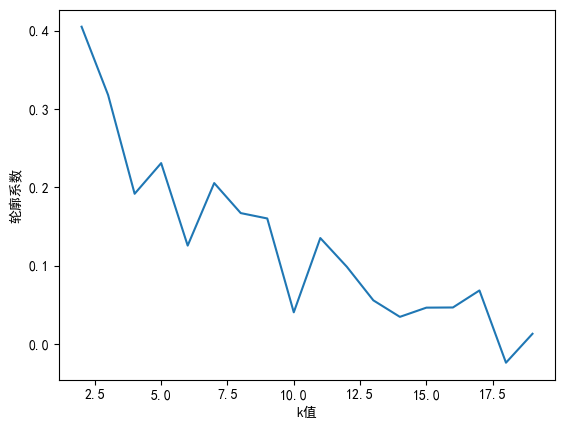

In [33]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.plot(number,score)
plt.xlabel("k值")
plt.ylabel("轮廓系数")
plt.show()

In [34]:
estimator=KMeans(algorithm="elkan",
               n_clusters=2,
               n_init=10,
               max_iter=200,
               verbose=0)
estimator.fit(sprotein_scaled)
y_pred=estimator.predict(sprotein_scaled)
print(y_pred)

[0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0]


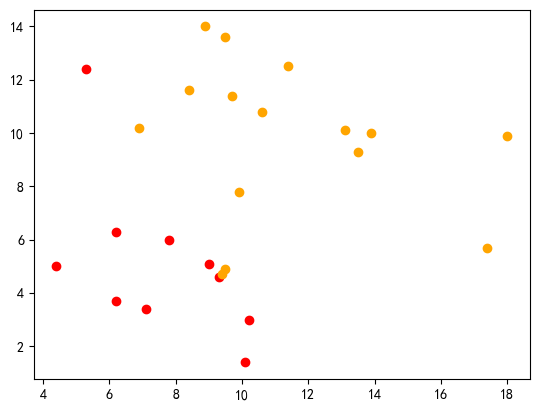

In [35]:
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        x1.append(sprotein['RedMeat'][i])
        y1.append(sprotein['WhiteMeat'][i])
    if y_pred[i]==1:
        x2.append(sprotein['RedMeat'][i])
        y2.append(sprotein['WhiteMeat'][i])
plt.scatter(x1,y1,c="red")
plt.scatter(x2,y2,c="orange")
plt.show()